# Exploratory Data Analisis - Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

<b>Carga y descripción general de los datos</b>

In [2]:
data = pd.read_csv('data/movies.csv')
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Selección de las preguntas - ¿Qué podemos aprender de estos datos?

Evitaré caer en preguntas personales sobre la temática. Las mismas, deben ser considerando los posibles clientes interesados en estos datos, es decir , pertenecientes a los mercados mas próximos del área. Las principales variables son las económicas y el score de la película. Para evitar considerar el aumento de la inflación en lapsos tan largos de tiempo, se trabaja con el cociente de los valores invertidos y ganados.

1) ¿Cuál es la relación (si la hay) de ingresos/presupuestos con la calificación de una película?
2) ¿Qué porcentaje del presupuesto recupera una película según su género?
3) ¿Garantiza la presencia de una estrella u otra el éxito popular de una película?
4) ¿Cuál es la evolución del cine en cada país?
5) ¿Las películas de categoría G o PG poseen menor duración que el resto?

## Primera pregunta
Comenzaremos analizando y limpiando algunos datos

In [4]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
data.gross.value_counts() #No hay valores ceros pero si nulos

14000000.0     3
5000000.0      2
10000000.0     2
12000000.0     2
626057.0       2
              ..
327333559.0    1
56631572.0     1
187436818.0    1
1007583.0      1
13266.0        1
Name: gross, Length: 7472, dtype: int64

In [6]:
data.budget.value_counts()

20000000.0    233
30000000.0    229
25000000.0    211
10000000.0    208
15000000.0    204
             ... 
34200000.0      1
30000.0         1
29750000.0      1
5250000.0       1
58750.0         1
Name: budget, Length: 413, dtype: int64

In [7]:
#Creamos y mostramos la nueva columna de recaudación final
data["profit"] = data.gross/data.budget
data[["budget",'gross',"profit"]]

,budget,gross,profit
0,19000000.0,46998772.0,2.473620
1,4500000.0,58853106.0,13.078468
2,18000000.0,538375067.0,29.909726
3,3500000.0,83453539.0,23.843868
4,6000000.0,39846344.0,6.641057
...,...,...,...
7663,7000.0,NaN,NaN
7664,NaN,NaN,NaN
7665,58750.0,NaN,NaN
7666,15000.0,NaN,NaN


In [8]:
data[["budget",'gross','profit']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  5497 non-null   float64
 1   gross   7479 non-null   float64
 2   profit  5436 non-null   float64
dtypes: float64(3)
memory usage: 179.8 KB


In [9]:
#Procederé a borrar los datos nulos, a pesar de su cantidad, ya que por la naturaleza de los datos considero inapropiado
#sustituirlos por algun valor estadístico
data.dropna(subset=['profit'], inplace=True)
data[["budget",'gross','profit']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  5436 non-null   float64
 1   gross   5436 non-null   float64
 2   profit  5436 non-null   float64
dtypes: float64(3)
memory usage: 169.9 KB


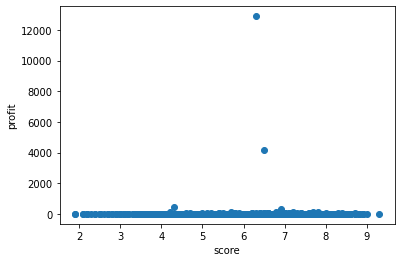

In [10]:
#Analizaremos un poco la gráfica entre las dos variables objetivo, buscando alguna relación entre ellas
fig1 = plt.figure()
plt.scatter(data['score'],data['profit']) #Crea un diagrama de dispersión
plt.xlabel('score') #Leyenda del eje x
plt.ylabel('profit') #Leyenda del eje y
plt.show() #Muestra el diagrama
fig1.savefig("images/pregunta1-1.jpeg")

In [11]:
#Se evidenciaron unos valores anómalos que afectan al análisis, revisaré cuales y por qué son
data[["budget",'gross','profit']].sort_values(by='profit',ascending=False).head(20)

,budget,gross,profit
5114,15000.0,193355800.0,12890.386667
3459,60000.0,248639099.0,4143.984983
6815,100000.0,42964410.0,429.644100
2093,7000.0,2040920.0,291.560000
5154,150000.0,20936722.0,139.578147
2467,27000.0,3151130.0,116.708519
4471,400000.0,46138887.0,115.347217
3233,25000.0,2804473.0,112.178920
4814,169000.0,18586834.0,109.981266
4304,500000.0,54683487.0,109.366974


In [12]:
data.loc[[5114,3459,6815,2093]]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000.0,193355800.0,Solana Films,86.0,12890.386667
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000.0,248639099.0,Haxan Films,81.0,4143.984983
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000.0,42964410.0,New Line Cinema,81.0,429.644100
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000.0,2040920.0,Columbia Pictures,81.0,291.560000


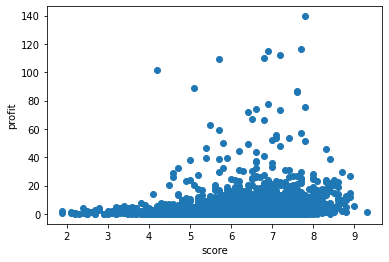

In [13]:
#Las anteriores películas guardan un porcentaje de ganancia mucho mayor al resto del dataset, así que
#procederé a quitarlo y volver a graficar
data.drop([5114,3459,6815,2093],axis=0,inplace=True)

fig2 = plt.figure()
plt.scatter(data['score'],data['profit'])
plt.xlabel('score')
plt.ylabel('profit')
plt.show()

fig2.savefig("images/pregunta1-2.jpeg")

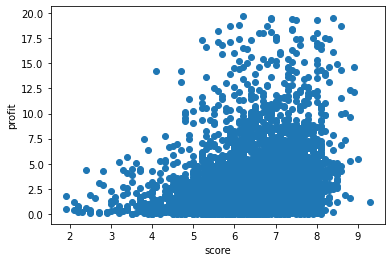

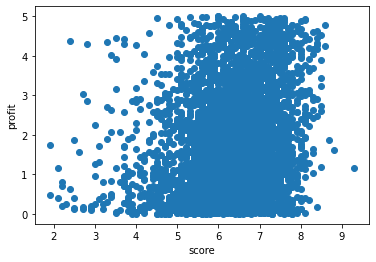

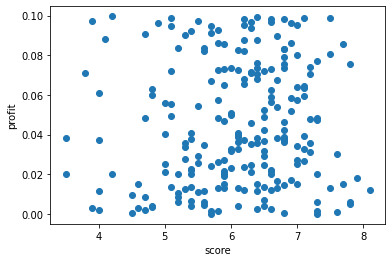

In [14]:
#Se sigue visualizando supuestos casos especiales, limitaremos el proceso a valores de profit cada vez menores
fig3 = plt.figure()
data2 = data[data['profit']<20]
plt.scatter(data2['score'],data2['profit'])
plt.xlabel('score')
plt.ylabel('profit')
plt.show()

fig4 = plt.figure()
data3 = data[data['profit']<5]
plt.scatter(data3['score'],data3['profit'])
plt.xlabel('score')
plt.ylabel('profit')
plt.show()

fig5 = plt.figure()
data4 = data[data['profit']<0.1]
plt.scatter(data4['score'],data4['profit'])
plt.xlabel('score')
plt.ylabel('profit')
plt.show()

fig3.savefig("images/pregunta1-3.jpeg")
fig4.savefig("images/pregunta1-4.jpeg")
fig5.savefig("images/pregunta1-5.jpeg")

<b>Conclusiones</b>

Se puede visualizar a gran escala una tendencia al reconocimiento popular (score) junto con lo que es un alto porcentaje de ganancias para las películas, pero que, al ir revisando los datos más a detalle, nos encontramos con que la gran mayoría presentan una distribución homogénea entre esos atributos. Mi conclusión, es que fuera de casos especiales de gran éxito, una buena película no puede medirse por el rédito que produce.

## Segunda pregunta
Comenzaremos ordenando un poco los datos a analizar

In [15]:
data.genre.value_counts()

Comedy       1496
Action       1416
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        251
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

Comenzaré mostrando y almacenando la información de cada género

1) No se podrá ir iterando sobre los mismos para agilizar, ya que cada uno presenta outliers diferentes que deben ser limpiados
2) Si bien se procesarán todos los géneros, por como están clasificados los datos en ellos (género principal) hay algunos con mínimos datos, que en una situación real de evaluación comercial deberían ser desestimados por ello, u optar por otra estructura de datos (géneros múltiples).

In [16]:
genre_profit = {}

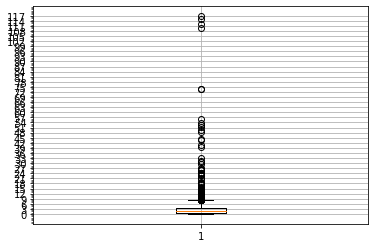

In [17]:
plt.boxplot(data[data.genre == 'Comedy'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,120,3))
plt.grid()
plt.show()

In [18]:
#En este caso, nos quedaremos con los valores de menores a 9.
genre_profit['Comedy'] = data[(data.genre == 'Comedy') & (data.profit<9)].profit

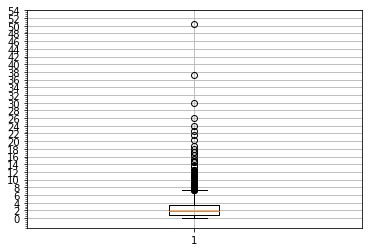

In [19]:
plt.boxplot(data[data.genre == 'Action'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,55,2))
plt.grid()
plt.show()

In [20]:
#En este caso, nos quedaremos con los valores de menores a 8.
genre_profit['Action'] = data[(data.genre == 'Action') & (data.profit<8)].profit

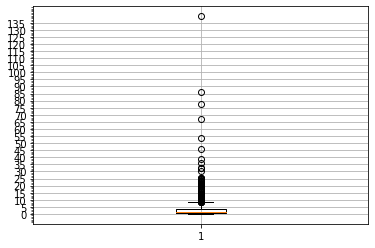

In [21]:
plt.boxplot(data[data.genre == 'Drama'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,140,5))
plt.grid()
plt.show()

In [22]:
#En este caso, nos quedaremos con los valores de menores a 10.
genre_profit['Drama'] = data[(data.genre == 'Drama') & (data.profit<10)].profit

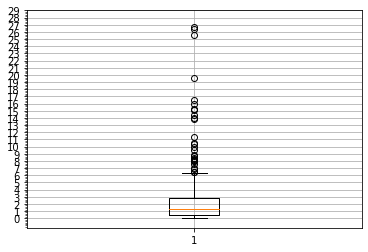

In [23]:
plt.boxplot(data[data.genre == 'Crime'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,30,1))
plt.grid()
plt.show()

In [24]:
#En este caso, nos quedaremos con los valores de menores a 7.
genre_profit['Crime'] = data[(data.genre == 'Crime') & (data.profit<7)].profit

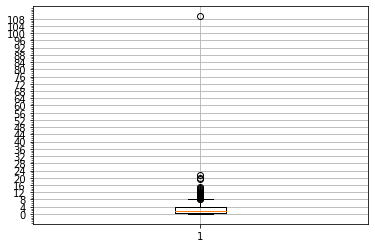

In [25]:
plt.boxplot(data[data.genre == 'Adventure'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,110,4))
plt.grid()
plt.show()

In [26]:
#En este caso, nos quedaremos con los valores de menores a 9.
genre_profit['Adventure'] = data[(data.genre == 'Adventure') & (data.profit<9)].profit

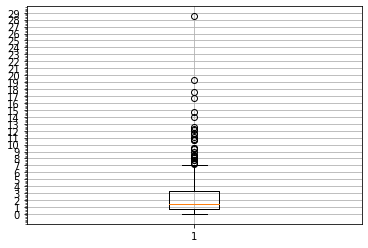

In [27]:
plt.boxplot(data[data.genre == 'Biography'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,30,1))
plt.grid()
plt.show()

In [28]:
#En este caso, nos quedaremos con los valores de menores a 7.
genre_profit['Biography'] = data[(data.genre == 'Biography') & (data.profit<7)].profit

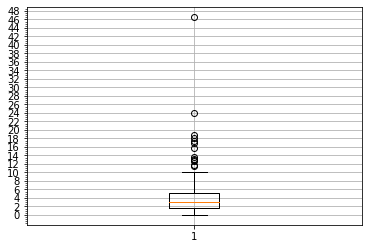

In [29]:
plt.boxplot(data[data.genre == 'Animation'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,50,2))
plt.grid()
plt.show()

In [30]:
#En este caso, nos quedaremos con los valores de menores a 10.
genre_profit['Animation'] = data[(data.genre == 'Animation') & (data.profit<10)].profit

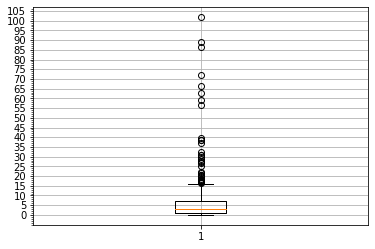

In [31]:
plt.boxplot(data[data.genre == 'Horror'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,110,5))
plt.grid()
plt.show()

In [32]:
#En este caso, nos quedaremos con los valores de menores a 17.
genre_profit['Horror'] = data[(data.genre == 'Horror') & (data.profit<17)].profit

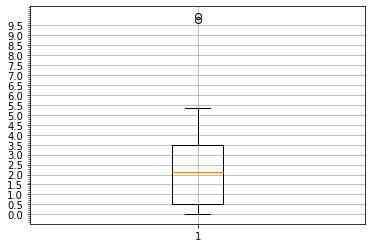

In [33]:
plt.boxplot(data[data.genre == 'Fantasy'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,10,0.5))
plt.grid()
plt.show()

In [34]:
#En este caso, nos quedaremos con los valores de menores a 5.5.
genre_profit['Fantasy'] = data[(data.genre == 'Fantasy') & (data.profit<5.5)].profit

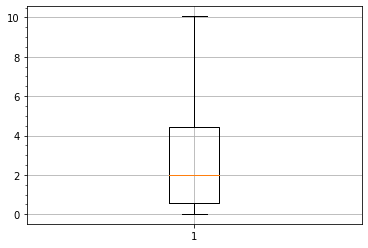

In [35]:
plt.boxplot(data[data.genre == 'Mystery'].profit)
plt.minorticks_on()
plt.grid()
plt.show()

In [36]:
#En este caso, nos quedaremos con los valores tal cual están.
genre_profit['Mystery'] = data[data.genre == 'Mystery'].profit

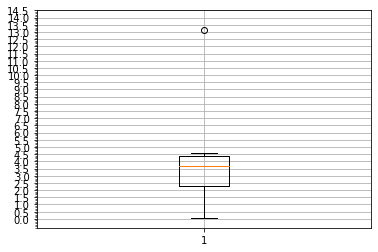

In [37]:
plt.boxplot(data[data.genre == 'Thriller'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,15,0.5))
plt.grid()
plt.show()

In [38]:
#En este caso, nos quedaremos con los valores de menores a 4.7.
genre_profit['Thriller'] = data[(data.genre == 'Thriller') & (data.profit<4.7)].profit

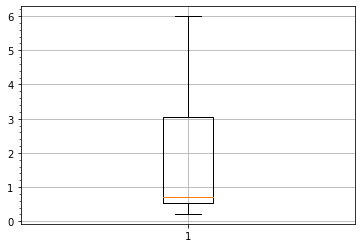

In [39]:
plt.boxplot(data[data.genre == 'Sci-Fi'].profit)
plt.minorticks_on()
plt.grid()
plt.show()

In [40]:
#En este caso, nos quedaremos con los valores tal cual están.
genre_profit['Sci-Fi'] = data[data.genre == 'Sci-Fi'].profit

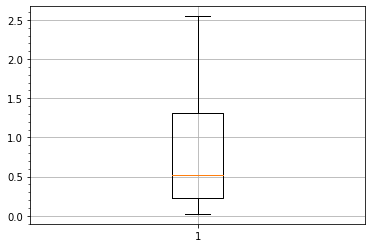

In [41]:
plt.boxplot(data[data.genre == 'Romance'].profit)
plt.minorticks_on()
plt.grid()
plt.show()

In [42]:
#En este caso, nos quedaremos con los valores tal cual están.
genre_profit['Romance'] = data[data.genre == 'Romance'].profit

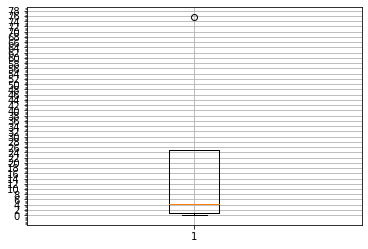

In [43]:
plt.boxplot(data[data.genre == 'Family'].profit)
plt.minorticks_on()
plt.yticks(np.arange(0,80,2))
plt.grid()
plt.show()

In [44]:
#En este caso, nos quedaremos con los valores de menores a 26.
genre_profit['Family'] = data[(data.genre == 'Family') & (data.profit<26)].profit

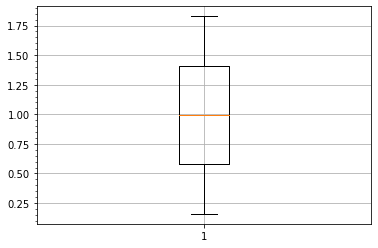

In [45]:
plt.boxplot(data[data.genre == 'Western'].profit)
plt.minorticks_on()
plt.grid()
plt.show()

In [46]:
#En este caso, nos quedaremos con los valores tal cual están.
genre_profit['Western'] = data[data.genre == 'Western'].profit

In [47]:
for key in genre_profit:
    print(key)

Comedy
Action
Drama
Crime
Adventure
Biography
Animation
Horror
Fantasy
Mystery
Thriller
Sci-Fi
Romance
Family
Western


In [48]:
#Ahora con los datos ya dispuestos, procederemos a obtener las estadísticas y ver su distribución
genre_mean_error={}
for key in genre_profit:
    mean,max,min = round(genre_profit[key].mean(),2),round(genre_profit[key].max(),2),round(genre_profit[key].min(),2)
    if max-mean >= mean-min:
        genre_mean_error[key] = [mean,round(max-mean,2)]
    else:
        genre_mean_error[key] = [mean,round(mean-min,2)]
for key in genre_mean_error:
    print(f'Género: {key}. Ganancia/inversión: {genre_mean_error[key][0]} +- {genre_mean_error[key][1]}.')

Género: Comedy. Ganancia/inversión: 2.25 +- 6.67.
Género: Action. Ganancia/inversión: 2.17 +- 5.81.
Género: Drama. Ganancia/inversión: 2.08 +- 7.69.
Género: Crime. Ganancia/inversión: 1.61 +- 5.33.
Género: Adventure. Ganancia/inversión: 2.2 +- 6.6.
Género: Biography. Ganancia/inversión: 1.78 +- 5.12.
Género: Animation. Ganancia/inversión: 3.28 +- 6.57.
Género: Horror. Ganancia/inversión: 3.56 +- 13.23.
Género: Fantasy. Ganancia/inversión: 2.15 +- 3.17.
Género: Mystery. Ganancia/inversión: 2.8 +- 7.26.
Género: Thriller. Ganancia/inversión: 2.83 +- 2.8.
Género: Sci-Fi. Ganancia/inversión: 2.0 +- 3.99.
Género: Romance. Ganancia/inversión: 0.93 +- 1.62.
Género: Family. Ganancia/inversión: 3.0 +- 4.9.
Género: Western. Ganancia/inversión: 0.99 +- 0.84.


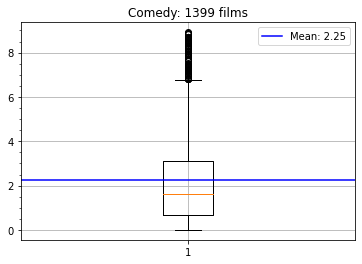

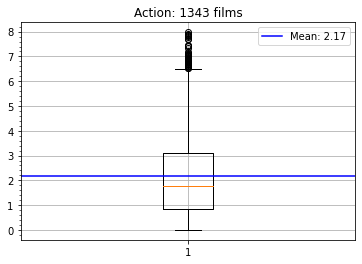

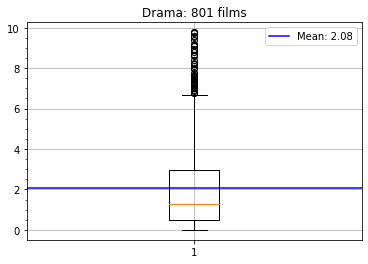

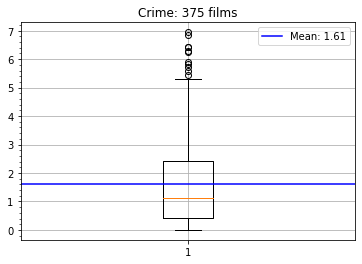

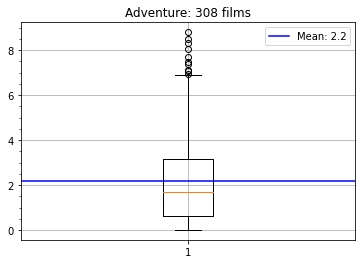

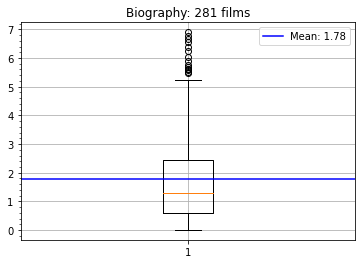

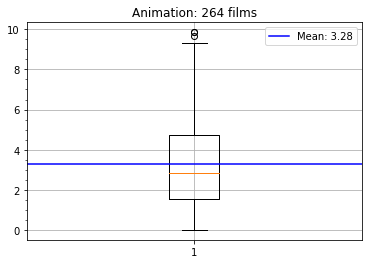

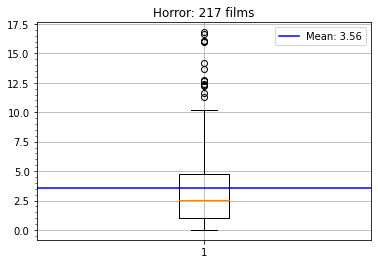

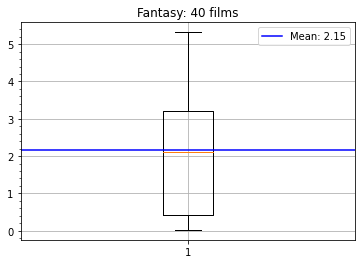

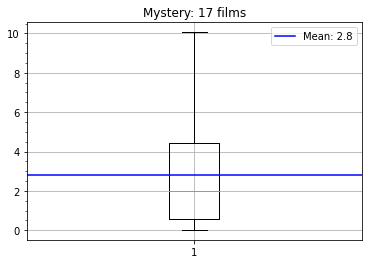

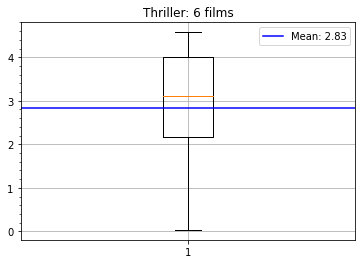

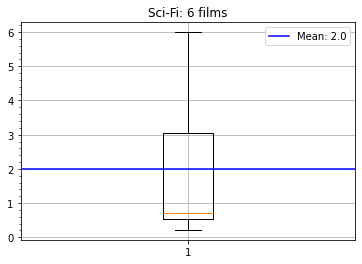

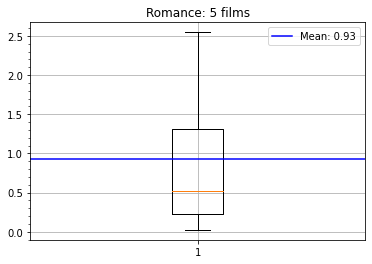

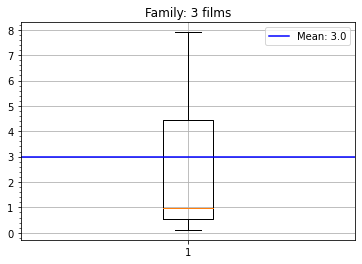

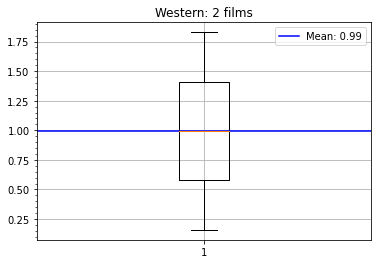

In [49]:
for key in genre_profit:
    fig = plt.figure()

    plt.boxplot(genre_profit[key])
    plt.axhline(y=genre_mean_error[key][0],color='blue',label=f'Mean: {genre_mean_error[key][0]}') #Linea azul que indica el valor promedio

    plt.title(f'{key}: {len(genre_profit[key])} films')
    plt.legend()
    plt.minorticks_on()
    plt.grid()
    plt.show

    fig.savefig(f"images/pregunta2-{key}.jpeg")

<b>Conclusiones</b>

La respuesta directa a la pregunta se logró obtener con su correspondiente incerteza. No obstante, la interpretación de los resultados, nos arroja que no hay géneros "seguros" a la hora de obtener ganancias. Todos obtienen resultados relativamente parecidos, con márgenes de error muy grande, donde el valor estimado de ganancia solo es alcanzado y/o superado por un 25% de las películas. A su vez, si debieramos elegir un género en cual invertir, habría que optar entre los 8 primeros de la lista, ya que poseen mas datos y sus resultados son más confiables. Horror o animación.

## Tercera pregunta
Comenzaremos ordenando los datos a utilizar, el análisis es similar al anterior, y posee la misma limitación al tener solo un actor principal

In [50]:
data.star.info()

<class 'pandas.core.series.Series'>
Int64Index: 5432 entries, 0 to 7652
Series name: star
Non-Null Count  Dtype 
--------------  ----- 
5432 non-null   object
dtypes: object(1)
memory usage: 84.9+ KB


In [51]:
#Reduciremos la cantidad de actores a los que mínimo hayan realizado 10 películas
star_films= data.star.value_counts()
star = star_films[star_films>10].index
star

Index(['Nicolas Cage', 'Robert De Niro', 'Tom Hanks', 'Bruce Willis',
       'Tom Cruise', 'Denzel Washington', 'Sylvester Stallone', 'Johnny Depp',
       'Adam Sandler', 'Eddie Murphy', 'Kevin Costner',
       'Arnold Schwarzenegger', 'Keanu Reeves', 'Harrison Ford',
       'Matthew McConaughey', 'Mel Gibson', 'Matt Damon', 'John Travolta',
       'Ben Stiller', 'Mark Wahlberg', 'Brad Pitt', 'Robin Williams',
       'Will Smith', 'Meryl Streep', 'Jeff Bridges', 'Richard Gere',
       'Dwayne Johnson', 'Jim Carrey', 'Clint Eastwood', 'Ben Affleck',
       'Al Pacino', 'Liam Neeson', 'John Cusack', 'George Clooney',
       'Leonardo DiCaprio', 'Steve Martin', 'Christian Bale', 'Sandra Bullock',
       'Will Ferrell', 'Robert Downey Jr.', 'Nicole Kidman', 'Michael Douglas',
       'Jackie Chan', 'Jack Nicholson', 'Kurt Russell',
       'Jean-Claude Van Damme', 'Ethan Hawke', 'Steve Carell', 'Jason Statham',
       'Sean Penn', 'Jake Gyllenhaal', 'Dennis Quaid', 'Anthony Hopkins',
      

Por la cantidad de actores, probaremos de responder nuestra pregunta desde los datos numéricos en primera medida

In [52]:
star_mean_error={}
for x in star:
    score = data[data.star==x].score
    statistics=[round(score.mean(),2),score.max(),score.min()]
    star_mean_error[x]=statistics
for key in star_mean_error:
    print(f'Star: {key}. Mean: {star_mean_error[key][0]}. Max score: {star_mean_error[key][1]}. Min score: {star_mean_error[key][2]}')

Star: Nicolas Cage. Mean: 6.21. Max score: 7.7. Min score: 3.1
Star: Robert De Niro. Mean: 6.72. Max score: 8.7. Min score: 4.2
Star: Tom Hanks. Mean: 7.09. Max score: 8.8. Min score: 5.6
Star: Bruce Willis. Mean: 6.51. Max score: 8.2. Min score: 4.6
Star: Tom Cruise. Mean: 6.85. Max score: 8.0. Min score: 4.9
Star: Denzel Washington. Mean: 6.96. Max score: 7.8. Min score: 5.6
Star: Sylvester Stallone. Mean: 6.09. Max score: 7.7. Min score: 3.9
Star: Johnny Depp. Mean: 6.95. Max score: 8.0. Min score: 5.5
Star: Adam Sandler. Mean: 6.15. Max score: 7.4. Min score: 3.3
Star: Eddie Murphy. Mean: 5.71. Max score: 7.7. Min score: 3.8
Star: Kevin Costner. Mean: 6.88. Max score: 8.0. Min score: 6.1
Star: Arnold Schwarzenegger. Mean: 6.25. Max score: 8.5. Min score: 3.8
Star: Keanu Reeves. Mean: 6.64. Max score: 8.7. Min score: 4.9
Star: Harrison Ford. Mean: 6.8. Max score: 8.4. Min score: 5.2
Star: Matthew McConaughey. Mean: 6.47. Max score: 8.6. Min score: 4.7
Star: Mel Gibson. Mean: 6.82. M

In [53]:
#Ordenaré los datos de acuerdo a la score promedio para nuestra interpretación
clients_sort = sorted(star_mean_error.items(), key=operator.itemgetter(1), reverse=True)
clients_sort
for x in clients_sort:
    print(f'Star rating: {x[0]}\nMean: {x[1][0]}. Max: {x[1][1]}. Min: {x[1][2]}\n')

Star rating: Leonardo DiCaprio
Mean: 7.5. Max: 8.8. Min: 6.5

Star rating: Christian Bale
Mean: 7.43. Max: 9.0. Min: 6.0

Star rating: Russell Crowe
Mean: 7.19. Max: 8.5. Min: 5.4

Star rating: Jake Gyllenhaal
Mean: 7.15. Max: 8.0. Min: 5.6

Star rating: Tom Hanks
Mean: 7.09. Max: 8.8. Min: 5.6

Star rating: Joaquin Phoenix
Mean: 7.06. Max: 8.4. Min: 6.5

Star rating: Robert Downey Jr.
Mean: 7.06. Max: 8.4. Min: 5.5

Star rating: Brad Pitt
Mean: 7.05. Max: 8.8. Min: 5.3

Star rating: Hugh Jackman
Mean: 7.05. Max: 8.1. Min: 6.1

Star rating: Joseph Gordon-Levitt
Mean: 7.05. Max: 7.6. Min: 6.4

Star rating: Cate Blanchett
Mean: 7.03. Max: 7.7. Min: 6.4

Star rating: Al Pacino
Mean: 7.0. Max: 8.3. Min: 5.3

Star rating: Denzel Washington
Mean: 6.96. Max: 7.8. Min: 5.6

Star rating: Johnny Depp
Mean: 6.95. Max: 8.0. Min: 5.5

Star rating: Woody Allen
Mean: 6.93. Max: 7.5. Min: 6.3

Star rating: Bill Murray
Mean: 6.92. Max: 8.0. Min: 5.5

Star rating: Morgan Freeman
Mean: 6.91. Max: 8.6. Mi

<b>Conclusiones</b>

En este caso, se puede apreciar directamente desde los datos de actores y la calificación obtenida en sus películas. Se aprecia como los actores, con mejor calificación en sus películas, también son aquellos que poseen menos incerteza en dicha estimación, y sus valores mínimos obtenidos siguen siendo más que aceptables. En los actores cuya media es más baja, por lo contrario, sus valores son más distantes. Se puede concluir de que existe una relación directa entre los actores principales y sus películas.

## Cuarta pregunta
Comenzaremos ordenando un poco los datos a analizar

In [54]:
data.country.info()

<class 'pandas.core.series.Series'>
Int64Index: 5432 entries, 0 to 7652
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
5431 non-null   object
dtypes: object(1)
memory usage: 84.9+ KB


In [55]:
#Borraremos ese dato nulo que se decta
data.dropna(subset=['country'], inplace=True)
data.country.info()

<class 'pandas.core.series.Series'>
Int64Index: 5431 entries, 0 to 7652
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
5431 non-null   object
dtypes: object(1)
memory usage: 84.9+ KB


In [56]:
#Como los datos se centran más en un mercado que en otros, haremos el análisis de países sobre aquellos que tengan más de 10
#películas en total
countrys=data.country.value_counts()
countrys = countrys[countrys>10].index
countrys

Index(['United States', 'United Kingdom', 'Canada', 'France', 'Germany',
       'Australia', 'Japan', 'China', 'Hong Kong', 'Ireland', 'Italy', 'Spain',
       'New Zealand', 'South Korea', 'Mexico'],
      dtype='object')

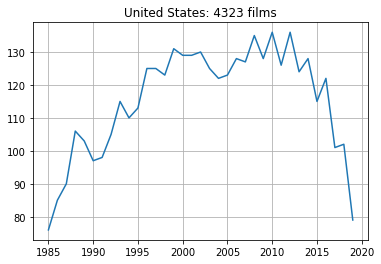

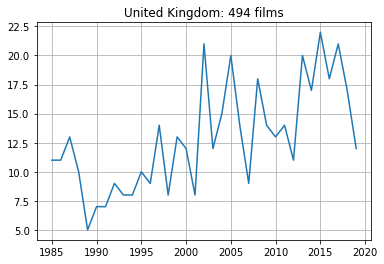

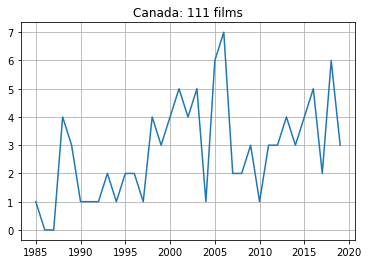

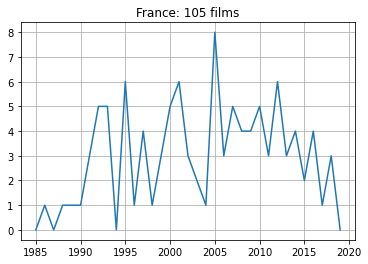

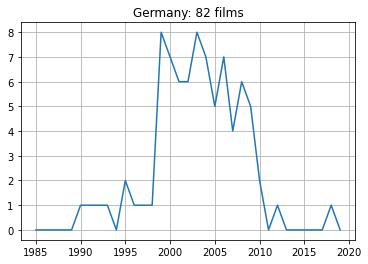

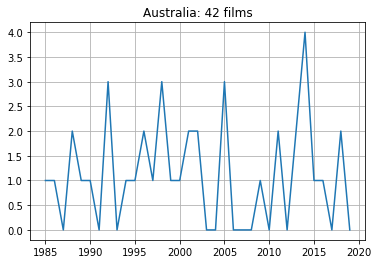

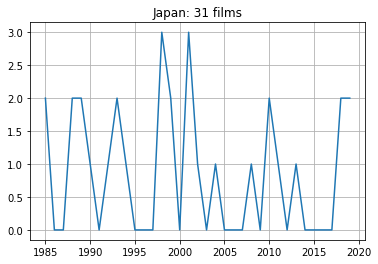

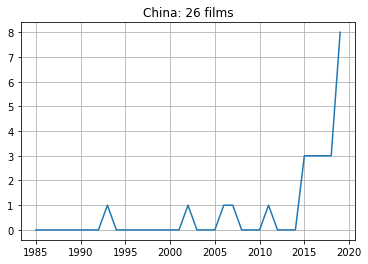

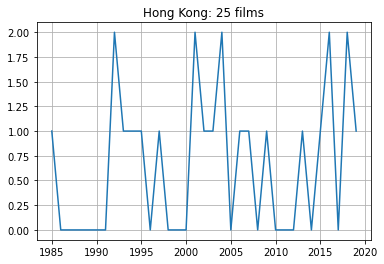

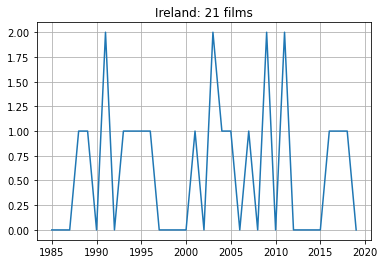

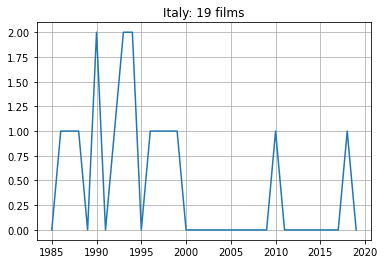

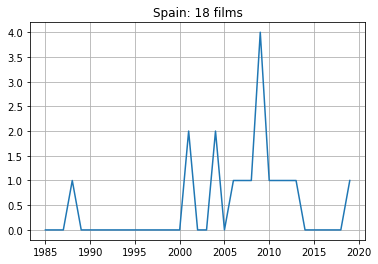

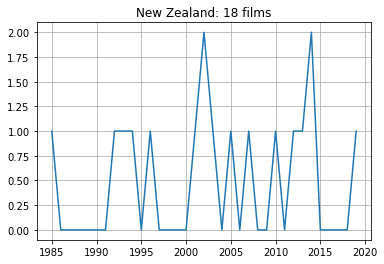

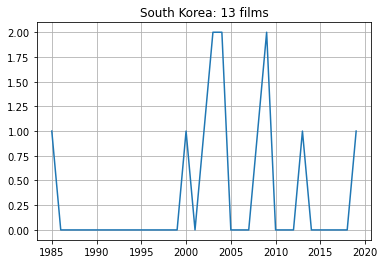

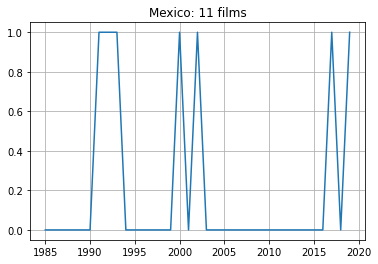

In [57]:
#Armaremos las gráficas de películas lanzadas por año de cada país
for x in countrys:
    year_films=[]
    x_data = data[data.country == x]
    x_year_films = x_data['year'].value_counts()
    for i in range(1985,2020,1):
        try:
            year_films.append(x_year_films[i])
        except KeyError:
            year_films.append(0)

    fig = plt.figure()

    plt.plot([x for x in range(1985,2020,1)],year_films)

    plt.title(f'{x}: {sum(x_year_films)} films')
    plt.grid()
    plt.show

    fig.savefig(f"images/pregunta4-{x}.jpeg")

<b>Conclusiones</b>

Se puede apreciar en las gráficas como ha sido la producción interna de películas. Se destaca, como en algunos casos, algunos países vieron una fuerte reducción de sus tendencias desde el 2010, y que en china desde ese periodo sucedió su mayor incremento. En el resto de casos, la elaboración de películas se mantuvo pareja.

## Quinta pregunta
Para esta consulta, deberemos comparar los valores de duración hallados entre películas infantiles y para un público mas restringuido.

In [58]:
data_runtime = data[['rating','runtime']]

In [59]:
data_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5431 entries, 0 to 7652
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   5420 non-null   object 
 1   runtime  5430 non-null   float64
dtypes: float64(1), object(1)
memory usage: 127.3+ KB


In [60]:
#Desechamos los datos nulos
data_runtime.dropna(inplace=True)
data_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5419 entries, 0 to 7652
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   5419 non-null   object 
 1   runtime  5419 non-null   float64
dtypes: float64(1), object(1)
memory usage: 127.0+ KB


C:\Users\Facu\AppData\Local\Temp\ipykernel_5040\609639318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_runtime.dropna(inplace=True)


In [61]:
rating_runtime=[]
for x in data_runtime.rating.unique():
    mean = data_runtime[data_runtime.rating == x].runtime.mean()
    rating_runtime.append([round(mean,2),x])
rating_runtime.sort()
rating_runtime


[[89.32, 'G'],
 [98.0, 'Unrated'],
 [103.47, 'PG'],
 [105.0, 'NC-17'],
 [109.09, 'R'],
 [110.36, 'PG-13'],
 [113.0, 'X'],
 [115.0, 'Approved'],
 [115.77, 'Not Rated'],
 [131.0, 'TV-MA']]

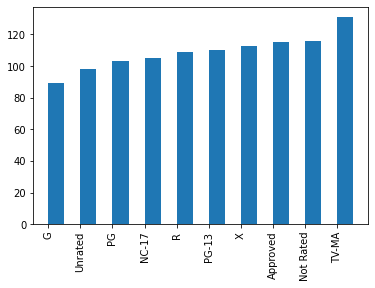

In [76]:
x = []
y = []
for i in rating_runtime:
    x.append(i[1])
    y.append(i[0])
figp5 =plt.figure()
plt.bar(x,y,width=0.5, align='edge')
plt.xticks(rotation=90)
plt.show()
figp5.savefig('images/pregunta5.jpeg',bbox_inches='tight',pad_inches=0.1)

<b>Conclusiones</b>

Como podría ser la suposición original, corroboramos que en efecto las peículas catalogadas como G y PG son de menor duración que el resto de categorias, cuya razón puede tener multiples origenes.